### Custom Data Generator

In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from itertools import repeat
from sklearn.model_selection import train_test_split

In [2]:
class CustomDataGen(tf.keras.utils.Sequence):
    
    def __init__(self, df, X_col, y_col,
                 batch_size,
                 input_size=(224, 224, 3),
                 shuffle=True):
        
        self.df = df.copy()
        self.X_col = X_col
        self.y_col = y_col
        self.batch_size = batch_size
        self.input_size = input_size
        self.shuffle = shuffle
        
        self.n = len(self.df)

    
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)
    
    def __get_input(self, path):
    
        image = tf.keras.preprocessing.image.load_img(path)
        image_arr = tf.keras.preprocessing.image.img_to_array(image)
        image_arr = tf.image.resize(image_arr,[self.input_size,self.input_size]).numpy()

        return image_arr/255.
    
    def __get_output(self, label):
        return label
    
    def __get_data(self, x_batches, y_batches):
        # Generates data containing batch_size samples
        X_batchs = np.asarray([self.__get_input(x) for x in x_batches])
        y_batches = np.asarray(self.__get_output(y_batches))
        return X_batchs,y_batches
    
    def __getitem__(self, index):
        
        X_batches = self.X_col[index*self.batch_size : (index+1)*self.batch_size]
        Y_batches = self.y_col[index*self.batch_size : (index+1)*self.batch_size]
        X,y= self.__get_data(X_batches,Y_batches)       
        return X, y
    
    def __len__(self):
        return self.n // self.batch_size

In [3]:
data_path = r"C:\Users\admin\Documents\GitHub\ML-in-production\ML_Deployment\flask\dataset"


sit_path = data_path+"\\sit"
stand_path = data_path+"\\stand"

In [4]:
sit_images_paths = glob(f'{sit_path}\\*.jpg')
stand_images_paths = glob(f'{stand_path}\\*.jpg')

sit_labels = []
stand_labels = []

#label sit --> 0, stand-->1
sit_labels.extend(repeat(0, len(sit_images_paths)))
stand_labels.extend(repeat(1, len(stand_images_paths)))

In [5]:
import pandas as pd

sit_df = pd.DataFrame(list(zip(sit_images_paths, sit_labels)), columns = ['image', 'label'])
stand_df = pd.DataFrame(list(zip(stand_images_paths, stand_labels)), columns = ['image', 'label'])


all_data  = pd.DataFrame(columns =['image', 'label'])
all_data = pd.concat([sit_df, stand_df], ignore_index=True)


In [6]:
train, val = train_test_split(all_data, train_size=0.9,test_size=0.1)


In [7]:
x_train = train['image']
y_train = train['label']

In [8]:
IMG_SIZE = 128
CHANNELS = 3
BATCH_SIZE = 8 

In [9]:
traingen = CustomDataGen(all_data, X_col = x_train, y_col=y_train,
                         batch_size = BATCH_SIZE ,input_size = IMG_SIZE, shuffle= True)

(128, 128, 3)
1


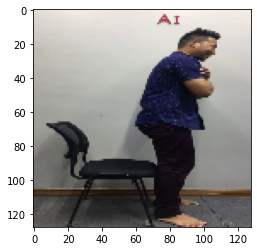

In [12]:
train_idx =5
x,y = traingen.__getitem__(8)
print(x[train_idx].shape)
print(y[train_idx])

plt.imshow(x[train_idx])

(128, 128, 3)
0


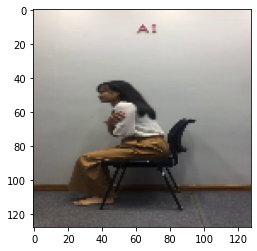

In [11]:
train_idx =6
x,y = traingen.__getitem__(8)
print(x[train_idx].shape)
print(y[train_idx])

plt.imshow(x[train_idx])

### Standard Keras Data Generator

In [62]:

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
target_size = (128, 128)

train_generator = train_datagen.flow_from_directory(
    directory=data_path,
    target_size=target_size,
    batch_size=8)


Found 912 images belonging to 2 classes.


(8, 128, 128, 3)
(128, 128, 3)


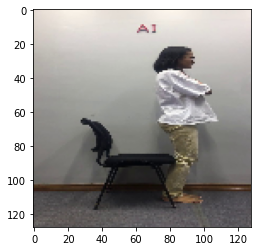

In [63]:
batch=next(train_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][1]   # this is the first image  batch[0][1] would be the next image
print(img.shape)

plt.imshow(img) 